In [5]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from timeit import default_timer as timer
import lightning as L
from torch.utils.data import DataLoader, random_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Setup training data
train_data = datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=ToTensor(),
)

# Setup testing data
test_data = datasets.MNIST(
    root='./data/',
    train=False, # get test data
    download=True,
    transform=ToTensor()
)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:06<00:00, 1.43MB/s]


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 272kB/s]


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.50MB/s]


Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



In [56]:
train_transform = transforms.Compose([
    transforms.RandomCrop(28, padding=2),
    transforms.RandomRotation(degrees=(-15, 15)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data/', download=False, train=True, transform=train_transform)
test_dataset = datasets.MNIST('./data/', download=False, train=False, transform=val_transform)
test_dataset, val_dataset = random_split(test_dataset, [0.50, 0.50])

In [15]:
train_dataset[2][0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '1')

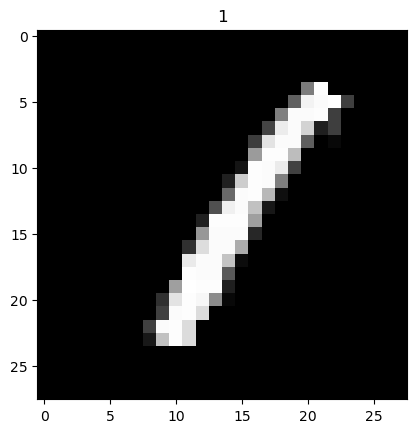

In [68]:
plt.imshow(train_dataset[3][0].squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(train_dataset[3][1])

In [5]:
from utils import tsne_and_cluster_from_ckpt, plot_tsne_color_toggle

### SmallCNN

In [4]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_file='epoch-epoch=00-val_loss=0.9165.ckpt')

plot_tsne_color_toggle(tsne, clusters, labels)

c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

In [8]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_file='epoch-epoch=02-val_loss=0.3193.ckpt')

plot_tsne_color_toggle(tsne, clusters, labels)

c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

In [5]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_file='epoch-epoch=04-val_loss=0.2157.ckpt')

plot_tsne_color_toggle(tsne, clusters, labels)

c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

### MLP

In [6]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_dir='log/lightning_logs_mlp/version_1/checkpoints', ckpt_file='best-epoch=51-val_loss=0.0884.ckpt', model='mlp')

plot_tsne_color_toggle(tsne, clusters, labels)

Loading MLP


c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

In [7]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_dir='log/lightning_logs_mlp/version_1/checkpoints', ckpt_file='epoch-epoch=00-val_loss=0.5647.ckpt', model='mlp')

plot_tsne_color_toggle(tsne, clusters, labels)

Loading MLP


c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

In [8]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_dir='log/lightning_logs_mlp/version_1/checkpoints', ckpt_file='epoch-epoch=02-val_loss=0.3231.ckpt', model='mlp')

plot_tsne_color_toggle(tsne, clusters, labels)

Loading MLP


c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)

In [9]:
embeddings, labels, tsne, clusters = tsne_and_cluster_from_ckpt(ckpt_dir='log/lightning_logs_mlp/version_1/checkpoints', ckpt_file='epoch-epoch=06-val_loss=0.2015.ckpt', model='mlp')

plot_tsne_color_toggle(tsne, clusters, labels)

Loading MLP


c:\Users\nicco\OneDrive\Documenti\nki_mnist_assignment\utils.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  split = torch.load("data/MNIST/train_val_split.pt")


alt.Chart(...)